In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from ipywidgets import interact, FloatSlider
from sklearn.preprocessing import MinMaxScaler
from ipywidgets import interact, Dropdown
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
df = pd.read_csv('nba.csv',sep =";", encoding='latin-1')



In [3]:
df.shape

(483, 30)

In [4]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
df.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [6]:
cat_vars = ['Pos', 'Tm']
for i in cat_vars:
    print(df[i].unique())

['C' 'SG' 'PF' 'PG' 'SF' 'SF-PF']
['TOR' 'MIA' 'UTA' 'MEM' 'MIN' 'PHO' 'CLE' 'MIL' 'ORL' 'NYK' 'WAS' 'POR'
 'DET' 'CHO' 'PHI' 'BOS' 'SAS' 'SAC' 'TOT' 'LAC' 'OKC' 'ATL' 'CHI' 'DEN'
 'BRK' 'HOU' 'IND' 'LAL' 'DAL' 'GSW' 'NOP']


In [7]:
for column in cat_vars:
    if column in df.columns:  
        value_counts = df[column].value_counts()
        print(f"Column: {column}")
        print(value_counts)

Column: Pos
Pos
SG       109
SF       105
PF        94
C         92
PG        82
SF-PF      1
Name: count, dtype: int64
Column: Tm
Tm
OKC    18
POR    18
LAC    18
PHI    18
MIL    18
SAC    17
MIA    17
HOU    17
WAS    17
ORL    16
CLE    16
PHO    16
MEM    16
DEN    16
GSW    16
NOP    16
LAL    15
ATL    15
IND    15
DAL    15
BRK    15
TOR    15
SAS    15
CHO    15
DET    15
NYK    15
MIN    15
UTA    15
CHI    14
BOS    13
TOT     6
Name: count, dtype: int64


In [8]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,24,TOR,7,0,20.7,3.0,6.9,...,0.857,1.7,4.9,6.6,1.6,0.4,0.4,1.4,2.0,7.1
1,2,Bam Adebayo,C,26,MIA,12,12,34.8,8.3,15.6,...,0.830,2.2,8.0,10.2,3.9,1.3,1.2,2.8,2.3,22.8
2,3,Ochai Agbaji,SG,23,UTA,12,4,17.8,1.8,4.3,...,0.500,0.9,2.0,2.9,0.9,0.3,0.8,0.6,1.4,4.8
3,4,Santi Aldama,PF,23,MEM,6,0,23.5,5.0,10.5,...,0.500,0.8,4.7,5.5,2.0,0.5,0.8,1.8,1.3,12.5
4,5,Nickeil Alexander-Walker,SG,25,MIN,12,2,19.7,2.1,5.0,...,0.333,0.1,1.7,1.8,2.4,0.8,0.8,1.0,1.5,5.4


In [9]:
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
478,467,Thaddeus Young,PF,35,TOR,3,0,3.3,0.7,1.3,...,0.000,0.3,0.7,1.0,1.0,0.0,0.0,0.3,0.0,1.3
479,468,Trae Young,PG,25,ATL,11,11,35.7,6.3,17.6,...,0.898,0.6,2.0,2.6,11.1,1.5,0.0,4.1,1.5,23.4
480,469,Omer Yurtseven,C,25,UTA,7,0,4.6,1.0,1.4,...,0.500,0.4,1.1,1.6,0.4,0.0,0.1,0.1,0.9,2.3
481,470,Cody Zeller,C,31,NOP,10,0,6.8,0.3,1.4,...,0.400,1.0,1.8,2.8,0.8,0.2,0.1,0.3,0.8,1.0
482,471,Ivica Zubac,C,26,LAC,11,11,25.9,4.3,7.3,...,0.600,3.0,5.3,8.3,0.8,0.2,1.6,1.4,3.2,10.5


In [10]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,...,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,236.472050,26.099379,8.320911,3.830228,18.699793,3.133747,6.764389,0.431329,0.951967,2.68530,...,0.610530,0.850104,2.544720,3.392547,1.957764,0.600828,0.392754,1.048447,1.572671,8.530435
std,136.449498,4.430943,3.996694,5.013691,10.836910,2.639502,5.400013,0.177420,0.951594,2.37028,...,0.341874,0.869024,1.976351,2.634834,1.965015,0.496334,0.477425,0.957723,0.956675,7.289047
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.500000,23.000000,5.000000,0.000000,8.850000,1.000000,2.600000,0.378000,0.100000,0.70000,...,0.500000,0.200000,1.000000,1.400000,0.500000,0.200000,0.000000,0.300000,0.800000,2.800000
50%,238.000000,25.000000,10.000000,0.000000,19.000000,2.500000,5.300000,0.447000,0.700000,2.20000,...,0.739000,0.600000,2.100000,2.900000,1.300000,0.500000,0.300000,0.800000,1.600000,6.600000
75%,354.500000,29.000000,12.000000,9.000000,28.700000,4.500000,10.000000,0.512500,1.500000,4.15000,...,0.857000,1.200000,3.700000,4.800000,2.900000,0.900000,0.500000,1.500000,2.300000,12.300000
max,471.000000,39.000000,14.000000,14.000000,38.400000,11.500000,22.700000,1.000000,5.600000,12.50000,...,1.000000,6.000000,10.800000,14.100000,12.500000,2.600000,3.500000,4.900000,4.000000,32.200000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      483 non-null    int64  
 1   Player  483 non-null    object 
 2   Pos     483 non-null    object 
 3   Age     483 non-null    int64  
 4   Tm      483 non-null    object 
 5   G       483 non-null    int64  
 6   GS      483 non-null    int64  
 7   MP      483 non-null    float64
 8   FG      483 non-null    float64
 9   FGA     483 non-null    float64
 10  FG%     483 non-null    float64
 11  3P      483 non-null    float64
 12  3PA     483 non-null    float64
 13  3P%     483 non-null    float64
 14  2P      483 non-null    float64
 15  2PA     483 non-null    float64
 16  2P%     483 non-null    float64
 17  eFG%    483 non-null    float64
 18  FT      483 non-null    float64
 19  FTA     483 non-null    float64
 20  FT%     483 non-null    float64
 21  ORB     483 non-null    float64
 22  DR

In [12]:
missing_data = df.isnull()

print(missing_data)
duplicates = df.duplicated()

# Displaying the duplicate rows
print("Duplicate Rows:")
print(df[duplicates])

# Dropping duplicates
df_no_duplicates = df.drop_duplicates()

        Rk  Player    Pos    Age     Tm      G     GS     MP     FG    FGA  \
0    False   False  False  False  False  False  False  False  False  False   
1    False   False  False  False  False  False  False  False  False  False   
2    False   False  False  False  False  False  False  False  False  False   
3    False   False  False  False  False  False  False  False  False  False   
4    False   False  False  False  False  False  False  False  False  False   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
478  False   False  False  False  False  False  False  False  False  False   
479  False   False  False  False  False  False  False  False  False  False   
480  False   False  False  False  False  False  False  False  False  False   
481  False   False  False  False  False  False  False  False  False  False   
482  False   False  False  False  False  False  False  False  False  False   

     ...    FT%    ORB    DRB    TRB    AST    STL    BLK    TO

In [13]:
df.dropna(thresh=5, inplace=True)


In [14]:
def plot_team_composition(position):
    df_filtered = df[df['Pos'] == position] if position != 'All' else df

    team_counts = df_filtered['Tm'].value_counts().reset_index()
    team_counts.columns = ['Team', 'Number of Players']

    fig = px.bar(
        team_counts,
        x='Team',
        y='Number of Players',
        title=f'Number of Players per Team - Position: {position}'
    )

    fig.show()

positions = ['All'] + sorted(df['Pos'].unique().tolist())
position_dropdown = Dropdown(options=positions, value='All', description='Position:')
interact(plot_team_composition, position=position_dropdown)

interactive(children=(Dropdown(description='Position:', options=('All', 'C', 'PF', 'PG', 'SF', 'SF-PF', 'SG'),…

<function __main__.plot_team_composition(position)>

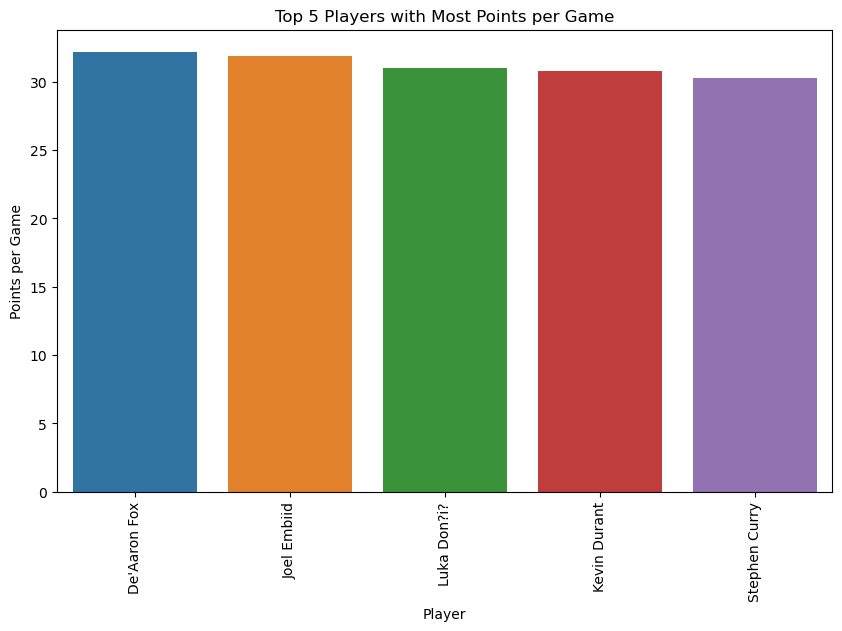

In [15]:
top_5_scorers = df.nlargest(5, 'PTS')['Player']

plt.figure(figsize=(10,6))
sns.barplot(x=top_5_scorers, y=df.loc[top_5_scorers.index, 'PTS'])
plt.title('Top 5 Players with Most Points per Game')
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Points per Game')
plt.show()

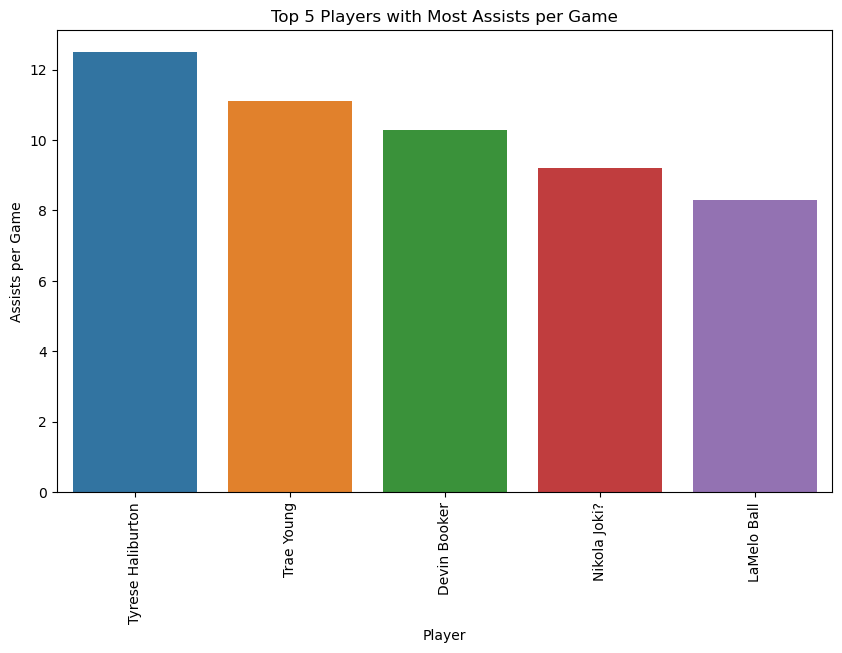

In [16]:
top_5_passers = df.nlargest(5, 'AST')['Player']
# Bar plot of top 5 scorers
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_passers, y=df.loc[top_5_passers.index, 'AST'])
plt.title('Top 5 Players with Most Assists per Game')
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Assists per Game')
plt.show()

In [17]:

scaler = MinMaxScaler()
df[['PTS_norm', 'FG%_norm', 'AST_norm', 'TOV_norm']] = scaler.fit_transform(df[['PTS', 'FG%', 'AST', 'TOV']])

def plot_top_players(pts_weight, fg_weight, ast_weight, tov_weight):
    df['CompositeScore'] = (df['PTS_norm'] * pts_weight +
                            df['FG%_norm'] * fg_weight +
                            df['AST_norm'] * ast_weight -
                            df['TOV_norm'] * tov_weight)
    top_players = df.sort_values(by='CompositeScore', ascending=False)
    print(top_players[['Player', 'CompositeScore']]) 


    fig = px.scatter_3d(
        top_players,
        x='AST', y='PTS', z='TOV',
        color='CompositeScore',
        hover_data=['Player'],
        title='Top 30 Players: 3D Plot (Assists, Points, FG%, Turnovers)',
        color_continuous_scale=px.colors.diverging.Tealrose, 
        opacity=0.8  
    )

    fig.update_layout(
        width=800, 
        height=600, 
        scene=dict(
            xaxis_title='Assists',
            yaxis_title='Points',
            zaxis_title='Turnovers'
        )
    )
    fig.update_traces(marker=dict(size=5, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

    fig.show()

interact(plot_top_players,
         pts_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='PTS Weight'),
         fg_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='FG% Weight'),
         ast_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='AST Weight'),
         tov_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='TOV Weight'))


interactive(children=(FloatSlider(value=1.0, description='PTS Weight', max=2.0), FloatSlider(value=1.0, descri…

<function __main__.plot_top_players(pts_weight, fg_weight, ast_weight, tov_weight)>

In [18]:

scaler = MinMaxScaler()
df[['TRB_norm', 'STL_norm', 'BLK_norm']] = scaler.fit_transform(df[['TRB', 'STL', 'BLK']])

def plot_top_players(trb_weight, stl_weight, blk_weight):
    df['CompositeScore'] = (df['TRB_norm'] * trb_weight +
                            df['STL_norm'] * stl_weight +
                            df['BLK_norm'] * blk_weight)

    print(df[['Player', 'CompositeScore']].sort_values(by='CompositeScore', ascending=False))

    top_players = df.sort_values(by='CompositeScore', ascending=False)

    fig = px.scatter_3d(
        top_players,
        x='TRB',
        y='STL',
        z='BLK',
        color='CompositeScore',
        hover_data=['Player']
    )

    fig.update_layout(
        title='Top Players Based on Weighted TRB, STL, BLK (3D Plot)',
        scene=dict(
            xaxis_title='Total Rebounds',
            yaxis_title='Steals',
            zaxis_title='Blocks'
        ),
        width=800,  
        height=600 
    )

    fig.show()

interact(plot_top_players,
         trb_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='TRB Weight'),
         stl_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='STL Weight'),
         blk_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='BLK Weight'))


interactive(children=(FloatSlider(value=1.0, description='TRB Weight', max=2.0), FloatSlider(value=1.0, descri…

<function __main__.plot_top_players(trb_weight, stl_weight, blk_weight)>

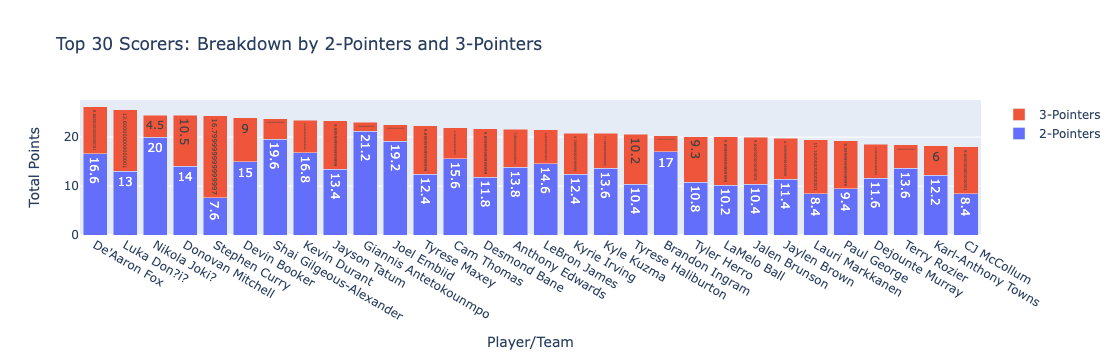

In [19]:
import plotly.graph_objects as go

df['2P_points'] = df['2P'] * 2
df['3P_points'] = df['3P'] * 3
df['Total_points'] = df['2P_points'] + df['3P_points']

top_scorers = df.sort_values('Total_points', ascending=False).head(30)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_scorers['Player'], 
    y=top_scorers['2P_points'],
    name='2-Pointers',
    hoverinfo='text',
    text=top_scorers['2P_points'],
))

fig.add_trace(go.Bar(
    x=top_scorers['Player'],  
    y=top_scorers['3P_points'],
    name='3-Pointers',
    hoverinfo='text',
    text=top_scorers['3P_points'],
))

fig.update_layout(
    barmode='stack',
    title='Top 30 Scorers: Breakdown by 2-Pointers and 3-Pointers',
    xaxis_title='Player/Team',
    yaxis_title='Total Points',
    hovermode='x'
)

fig.show()


In [20]:

scaler = MinMaxScaler()
normalized_columns = ['PTS', 'AST', 'FG%', 'TOV', 'BLK', 'STL', 'TRB']
df[normalized_columns] = scaler.fit_transform(df[normalized_columns])

team_to_city = {
    'TOR': {'lat': 43.7, 'lon': -79.4},   # Toronto Raptors
    'MIA': {'lat': 25.8, 'lon': -80.2},   # Miami Heat
    'UTA': {'lat': 40.8, 'lon': -111.9},  # Utah Jazz
    'MEM': {'lat': 35.1, 'lon': -90.0},   # Memphis Grizzlies
    'MIN': {'lat': 44.9, 'lon': -93.2},   # Minnesota Timberwolves
    'PHO': {'lat': 33.4, 'lon': -112.0},  # Phoenix Suns
    'CLE': {'lat': 41.5, 'lon': -81.7},   # Cleveland Cavaliers
    'MIL': {'lat': 43.0, 'lon': -87.9},   # Milwaukee Bucks
    'ORL': {'lat': 28.5, 'lon': -81.4},   # Orlando Magic
    'NYK': {'lat': 40.7, 'lon': -74.0},   # New York Knicks
    'WAS': {'lat': 38.9, 'lon': -77.0},   # Washington Wizards
    'POR': {'lat': 45.5, 'lon': -122.7},  # Portland Trail Blazers
    'DET': {'lat': 42.3, 'lon': -83.0},   # Detroit Pistons
    'CHO': {'lat': 35.2, 'lon': -80.8},   # Charlotte Hornets
    'PHI': {'lat': 39.9, 'lon': -75.2},   # Philadelphia 76ers
    'BOS': {'lat': 42.3, 'lon': -71.1},   # Boston Celtics
    'SAS': {'lat': 29.4, 'lon': -98.5},   # San Antonio Spurs
    'SAC': {'lat': 38.5, 'lon': -121.5},  # Sacramento Kings
    'TOT': {'lat': 43.7, 'lon': -79.4},   # Placeholder for traded players
    'LAC': {'lat': 34.0, 'lon': -118.3},  # LA Clippers
    'OKC': {'lat': 35.5, 'lon': -97.5},   # Oklahoma City Thunder
    'ATL': {'lat': 33.7, 'lon': -84.4},   # Atlanta Hawks
    'CHI': {'lat': 41.8, 'lon': -87.6},   # Chicago Bulls
    'DEN': {'lat': 39.7, 'lon': -105.0},  # Denver Nuggets
    'BRK': {'lat': 40.7, 'lon': -74.0},   # Brooklyn Nets
    'HOU': {'lat': 29.7, 'lon': -95.4},   # Houston Rockets
    'IND': {'lat': 39.8, 'lon': -86.2},   # Indiana Pacers
    'LAL': {'lat': 34.0, 'lon': -118.3},  # Los Angeles Lakers
    'DAL': {'lat': 32.8, 'lon': -96.8},   # Dallas Mavericks
    'GSW': {'lat': 37.8, 'lon': -122.4},  # Golden State Warriors
    'NOP': {'lat': 29.9, 'lon': -90.1}    # New Orleans Pelicans
}
# Function to update plot based on slider values
def plot_players(pts_weight, ast_weight, fg_weight, tov_weight, blk_weight, stl_weight, trb_weight):
    # Recalculate composite score inside the function
    df['CompositeScore'] = (df['PTS'] * pts_weight +
                            df['AST'] * ast_weight +
                            df['FG%'] * fg_weight -
                            df['TOV'] * tov_weight +
                            df['BLK'] * blk_weight +
                            df['STL'] * stl_weight +
                            df['TRB'] * trb_weight)

    # Filter the top players
    top_players = df.sort_values(by='CompositeScore', ascending=True)
    print(top_players[['Player', 'CompositeScore']]) 

    # Add team city coordinates to the DataFrame
    top_players['lat'] = top_players['Tm'].map(lambda x: team_to_city.get(x, {}).get('lat', None))
    top_players['lon'] = top_players['Tm'].map(lambda x: team_to_city.get(x, {}).get('lon', None))

    # Create the plot
    fig = px.scatter_geo(
        top_players,
        lat='lat',
        lon='lon',
        color='CompositeScore',
        hover_name='Player',
        hover_data=['CompositeScore'],
        title='NBA Players Composite Score by Team City',
        scope='usa'
    )
    fig.show()

interact(plot_players,
         pts_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='PTS Weight', continuous_update=True),
         ast_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='AST Weight', continuous_update=True),
         fg_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='FG% Weight', continuous_update=True),
         tov_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='TOV Weight', continuous_update=True),
         blk_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='BLK Weight', continuous_update=True),
         stl_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='STL Weight', continuous_update=True),
         trb_weight=FloatSlider(value=1, min=0, max=2, step=0.1, description='TRB Weight', continuous_update=True))



interactive(children=(FloatSlider(value=1.0, description='PTS Weight', max=2.0), FloatSlider(value=1.0, descri…

<function __main__.plot_players(pts_weight, ast_weight, fg_weight, tov_weight, blk_weight, stl_weight, trb_weight)>